In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Lab 4: Linear Regression**<br>

Regression is the process of estimating a model that produces the best fit for the given data. **Linear Regression** is the simplest and most popular among them. A linear regression model is given by $y = a_0 + a_1x$, where $a_0$ and $a_1$ are the parameters of the regression model. The values of these two parameters should be such that the produced result of ($a_0$ + $a_1x$) should have the least deviation from the actual result. In order to measure how well our model fits the data or whether it deviates from the actual result, we use the least square criterion $\sum_{i=1}^n E_i^2$.

<br>
The optimal parameters for $y = a_0 + a_1x$ ultimately boils down to,
<br>
$$a_0 = \frac{n\sum_{i=1}^n x_iy_i - \sum_{i=1}^nx_i\sum_{i=1}^ny_i}{n\sum_{i=1}^nx_i^2 - (\sum_{i=1}^nx_i)^2}$$
<br>
$$a_1 = \frac{\sum_{i=1}^n x_i^2\sum_{i=1}^ny_i - \sum_{i=1}^nx_i\sum_{i=1}^nx_iy_i}{n\sum_{i=1}^nx_i^2 - (\sum_{i=1}^nx_i)^2}$$
<br>

In today's lab, we will be implementing the Linear Regression in python. Note that there might be built-in functions for linear regression in python, but the purpose of this lab is to understand how linear regression actually works, and hence those built-in functions are not allowed. To test our implementation, we will be using the same data that is available in the first example of our class lecture PDF. That way, you can check whether your implementation is working correctly by comparing with the results obtained in that example.

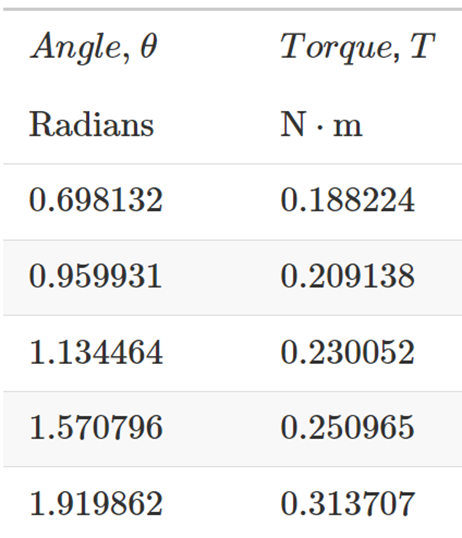

Run the following cell to load the known data points:

In [ ]:
theta = [0.698132, 0.959931, 1.134464, 1.570796, 1.919862]
torque = [0.18824, 0.209138, 0.230052, 0.250965, 0.313707]

##Task 1
Assuming that the linear regression model for the given data is defined as $T = a_0 + a_1*\theta$, write a function that takes the given data as input and returns the regression parameters $a_0$ and $a_1$.

In [ ]:
def LinearRegression(theta, torque):
    a0 = 0
    a1 = 0
    #Write your implementation for setting a0 and a1 here
    n=len(theta)
    theta=np.array(theta)
    torque=np.array(torque)
    a1=(n*np.sum(theta*torque)-np.sum(theta)*np.sum(torque))/(n*np.sum(theta**2)-np.sum(theta)**2)
    a0=(np.sum(theta**2)*np.sum(torque)-np.sum(theta)*np.sum(theta*torque))/(n*np.sum(theta**2)-np.sum(theta)**2)
    return a0, a1

In [ ]:
a0, a1 = LinearRegression(theta, torque)
print(f'a0 = {a0} Nm, a1 = {a1} Nm/rad')

a0 = 0.11768012662481922 Nm, a1 = 0.09608206138700416 Nm/rad


The output should be,<br>
$a_0 = 0.11768012662481919 \text{Nm},$<br>$a_1 = 0.09608206138700422 \text{Nm/rad}$

##Task 2
Write another function that takes any arbitrary value $x$ as input and applies the regression model to generate the output $y_{pred}$.

In [ ]:
def calculate(x):
    #Write your implementation here
    a0, a1 = LinearRegression(theta, torque)
    y_pred = a0+a1*x

    return y_pred

##Task 3
Use the calculate function for two values outside the given theta values to generate two new torque values and use these to generate a plot of the regression line. Show the original data points $(\theta_i, T_i)$ on the same plot using scatter function. Use **different colors** for the regression line and the original data points and show a legend. For this task, you are allowed to use various libraries such as `matplotlib`.

**Tip:** `np.linspace()` might come in handy.

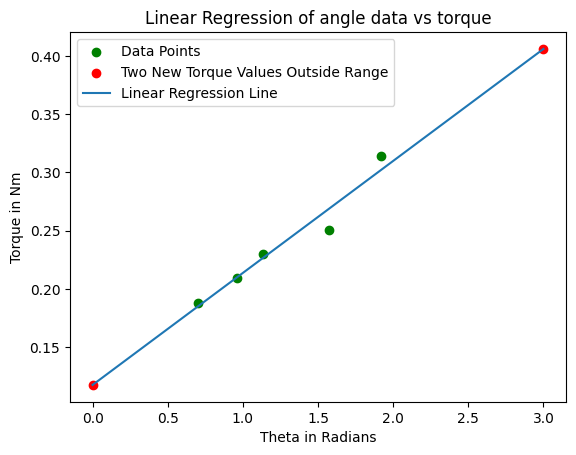

In [ ]:
fig, ax = plt.subplots()
ax.scatter(theta,torque,c='green',label="Data Points")
theta_tmp=np.linspace(0,3)
x=[0,3]
y=[]
for i in x:
    y.append(calculate(i))
ax.scatter(x,y,c='red',label='Two New Torque Values Outside Range')
torque_tmp=[]
for i in theta_tmp:
    torque_tmp.append(calculate(i))
ax.plot(theta_tmp,torque_tmp,label="Linear Regression Line")
ax.set_xlabel("Theta in Radians")
ax.set_ylabel("Torque in Nm")
plt.legend()
plt.title("Linear Regression of angle data vs torque")
plt.show()

The linear regression graph should look something like this.
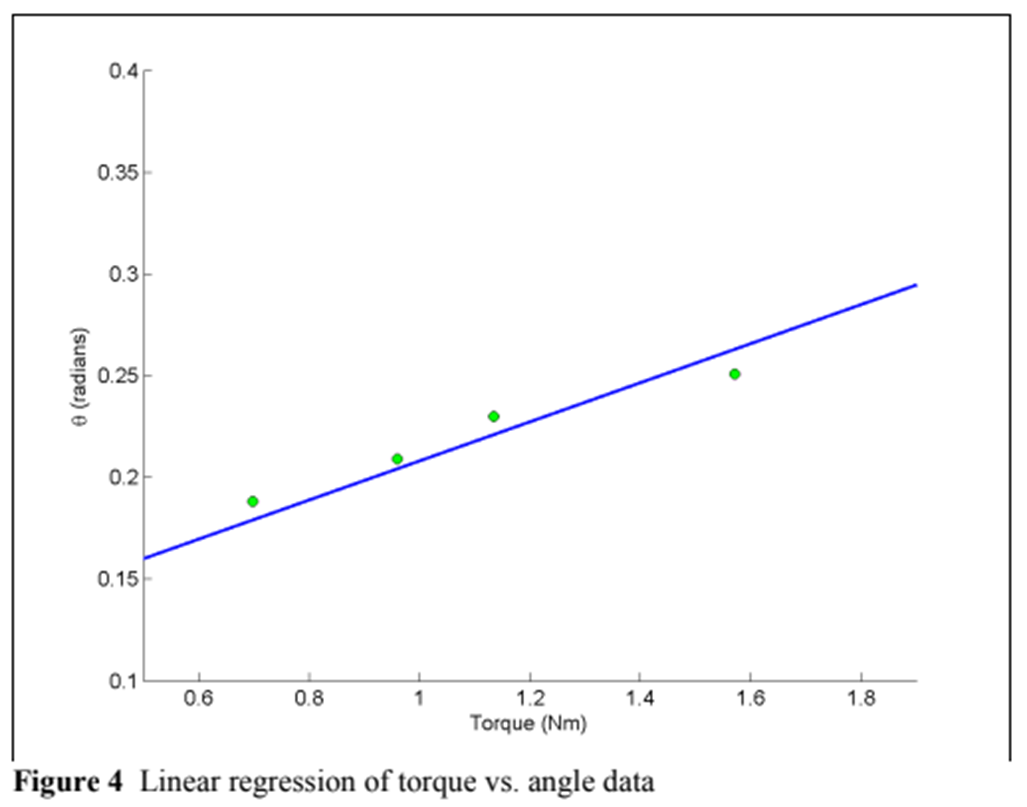

It may also look something like this.<br>
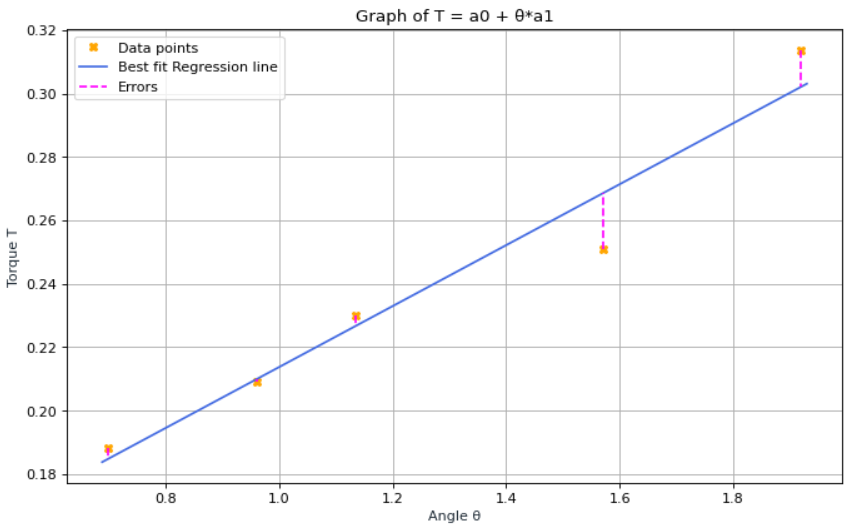